# Exploratory Data Analysis on IMDB Movies
##### By Jason Lowther

In this Notebook I will be exploring the data within the 'IMDB Movies Dataset' found here: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows


## Step 1: Importing the Necessary Packages

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Importing the Dataset and Cleaning

In [11]:
data = pd.read_csv('C:/Users/jml10/Desktop/Python/Datasets/imdb_top_1000.csv')

To make sure everything was imported correctly, we can take a quick look at the data with the head method.

In [12]:
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [60]:
#Check if any type conversions need to be done
data.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

## Step 3: Explore the Rating Systems

This dataset offers two avenues to determine which film is the best: we are given IMDB Rating and Meta score rating. Luckily, the data is already sorted by the top IMDB rating, as shown above, and so we now need to sort by the top Metacritic rating. Unfortunately, Metacritic ratings are not as common as IMDB ratings, so we must first create a new dataframe using the films with a Metascore.

In [19]:
data_Metascore = data[data['Meta_score'].notnull()]
data_Metascore.sort_values('Meta_score', ascending=False)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
440,https://m.media-amazon.com/images/M/MV5BMjE5NT...,Sweet Smell of Success,1957,Approved,96 min,"Drama, Film-Noir",8.0,Powerful but unethical Broadway columnist J.J....,100.0,Alexander Mackendrick,Burt Lancaster,Tony Curtis,Susan Harrison,Martin Milner,28137,NaN
81,https://m.media-amazon.com/images/M/MV5BNGUxYW...,Rear Window,1954,U,112 min,"Mystery, Thriller",8.4,A wheelchair-bound photographer spies on his n...,100.0,Alfred Hitchcock,James Stewart,Grace Kelly,Wendell Corey,Thelma Ritter,444074,"36,764,313"
50,https://m.media-amazon.com/images/M/MV5BY2IzZG...,Casablanca,1942,U,102 min,"Drama, Romance, War",8.5,A cynical expatriate American cafe owner strug...,100.0,Michael Curtiz,Humphrey Bogart,Ingrid Bergman,Paul Henreid,Claude Rains,522093,"1,024,560"
260,https://m.media-amazon.com/images/M/MV5BYTg1Mm...,Trois couleurs: Rouge,1994,U,99 min,"Drama, Mystery, Romance",8.1,A model discovers a retired judge is keen on i...,100.0,Krzysztof Kieslowski,Irène Jacob,Jean-Louis Trintignant,Frédérique Feder,Jean-Pierre Lorit,90729,"4,043,686"
559,https://m.media-amazon.com/images/M/MV5BYTc1NG...,Notorious,1946,U,102 min,"Drama, Film-Noir, Romance",7.9,A woman is asked to spy on a group of Nazi fri...,100.0,Alfred Hitchcock,Cary Grant,Ingrid Bergman,Claude Rains,Louis Calhern,92306,"10,464,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,https://m.media-amazon.com/images/M/MV5BMTgwNT...,Kai po che!,2013,U,130 min,"Drama, Sport",7.7,Three friends growing up in India at the turn ...,40.0,Abhishek Kapoor,Amit Sadh,Sushant Singh Rajput,Rajkummar Rao,Amrita Puri,32628,"1,122,527"
917,https://m.media-amazon.com/images/M/MV5BMTU0Nz...,Seven Pounds,2008,UA,123 min,Drama,7.6,A man with a fateful secret embarks on an extr...,36.0,Gabriele Muccino,Will Smith,Rosario Dawson,Woody Harrelson,Michael Ealy,286770,"69,951,824"
356,https://m.media-amazon.com/images/M/MV5BYmI1OD...,Tropa de Elite,2007,R,115 min,"Action, Crime, Drama",8.0,"In 1997 Rio de Janeiro, Captain Nascimento has...",33.0,José Padilha,Wagner Moura,André Ramiro,Caio Junqueira,Milhem Cortaz,98097,"8,060"
942,https://m.media-amazon.com/images/M/MV5BODNiZm...,The Butterfly Effect,2004,U,113 min,"Drama, Sci-Fi, Thriller",7.6,Evan Treborn suffers blackouts during signific...,30.0,Eric Bress,J. Mackye Gruber,Ashton Kutcher,Amy Smart,Melora Walters,451479,"57,938,693"


Already, it seems like the Metascore is a more forgiving metric than the IMDB Rating, just by how many 100s there are. How many are there exactly, and what are their titles?

In [36]:
print('Number of perfect movies: ',data_Metascore['Meta_score'].value_counts()[100.0])
data_Metascore.sort_values('Meta_score', ascending = False).Series_Title.head(12)

Number of perfect movies:  12


440    Sweet Smell of Success
81                Rear Window
50                 Casablanca
260     Trois couleurs: Rouge
559                 Notorious
274       Fanny och Alexander
423            Il conformista
1               The Godfather
491                   Boyhood
124              Citizen Kane
119                   Vertigo
116        Lawrence of Arabia
Name: Series_Title, dtype: object

### Is Metacritic a more forgiving metric than IMDB? 
It will be difficult to say for sure, but for starters we can certainly find more information. Let's begin with gathering some basic statistics for both rating systems. Note: there are no null values in the IMDB Rating column.

In [83]:
data_Metascore['IMDB_Rating'].describe()

count    843.000000
mean       7.931673
std        0.283732
min        7.600000
25%        7.700000
50%        7.900000
75%        8.100000
max        9.300000
Name: IMDB_Rating, dtype: float64

In [42]:
data_Metascore['Meta_score'].apply(lambda x:x/10).describe()

count    843.000000
mean       7.797153
std        1.237610
min        2.800000
25%        7.000000
50%        7.900000
75%        8.700000
max       10.000000
Name: Meta_score, dtype: float64

After adjusting the data to be on the same scale, we can see that the average score for IMDB Ratings are actually *higher* than the Metacritic scores. This makes sense to an extent, since this data set is the top 1000 of IMDB ratings, not the top 1000 of Metacritic scores.

In [79]:
Worst_Movie = data_Metascore[data_Metascore['Meta_score']==28]
print('The worst Metacritic movie is: {}'.format(Worst_Movie['Series_Title'].values[0]))
print('The IMDB Rating of {} is {}'.format((Worst_Movie['Series_Title'].values[0]), Worst_Movie['IMDB_Rating'].values[0]))

The worst Metacritic movie is: I Am Sam
The IMDB Rating of I Am Sam is 7.7


This is a *huge* difference of rating.

## Step 4: Is there a correlation between IMDB Ratings and Metascores?

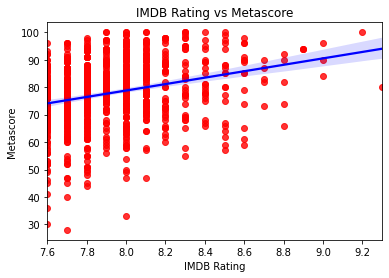

In [89]:
sns.regplot(x='IMDB_Rating', y='Meta_score', data=data_Metascore, scatter_kws = {'color':'red'}, line_kws={'color':'blue'})
plt.title('IMDB Rating vs Metascore')
plt.xlabel('IMDB Rating')
plt.ylabel('Metascore')
plt.show()

In [95]:
data_Metascore.corr()

,IMDB_Rating,Meta_score,No_of_Votes
IMDB_Rating,1.000000,0.268531,0.586664
Meta_score,0.268531,1.000000,-0.018507
No_of_Votes,0.586664,-0.018507,1.000000


Text(0.5, 1.0, 'Correlation Matrix for Numeric Features')

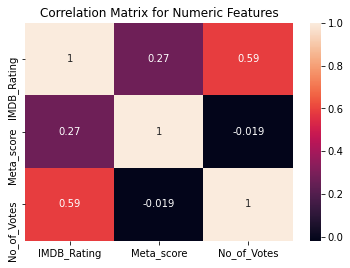

In [99]:
correlation_matrix = data_Metascore.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

Now *this* is interesting. The IMDB Ratings and Metscores are positively correlated, however the correlation is fairly weak. It seems as if the critics at IMDB and the critics at Metacritic agree mostly on which movies are good, however *how good* is up for interpretation. Also, the Metascore is essentially noncorrelated with the Number of Votes a movie gets - meaning the Metascore differs from public opinion much more than the IMDB Rating. 